# Tic Tac Toe Game (Noughts and Crosses)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from platform import python_version

from gamelearner import *
python_version()

'3.6.6'

## Game dynamics

In [2]:
game = TicTacToeGame()
game

TicTacToeGame()

In [3]:
game.roles

[1, 2]

In [4]:
game.marks

['X', 'O']

In [5]:
game.state

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [6]:
game.make_move((1, (0, 2)))
game.make_move((2, (0, 1)))
game.make_move((1, (1, 1)))
game.make_move((2, (2, 2)))

In [7]:
game.show_state()

_ O X
_ X _
_ _ O


In [8]:
game.get_rewards()

{1: 0.0}

In [9]:
game.check_if_game_over()

False

In [10]:
game.moves

[(1, (0, 2)), (2, (0, 1)), (1, (1, 1)), (2, (2, 2))]

In [11]:
game.turn

1

In [12]:
game.available_moves()

[(0, 0), (1, 0), (1, 2), (2, 0), (2, 1)]

In [13]:
try:
    game.make_move((2, (2,0)))
except ValueError as err:
    print(err)

It is not player 2's turn.


In [14]:
game.make_move((1, (2,0)))
game.show_state()

_ O X
_ X _
X _ O


In [15]:
game.game_over

True

In [16]:
print(game.winner)

1


In [17]:
game.get_rewards()

{2: 0.0}

In [18]:
game.reverse_move()
game.reverse_move()

In [19]:
game.show_state()

_ O X
_ X _
_ _ _


In [20]:
game.make_move((2, (2,0)))
game.show_state()

_ O X
_ X _
O _ _


In [21]:
game.get_rewards()

{1: 0.0}

In [22]:
game.make_move((1, (1,2)))
game.show_state()

_ O X
_ X X
O _ _


In [23]:
game.make_move((2, (2,2)))
game.make_move((1, (1,0)))
game.show_state()

_ O X
X X X
O _ O


In [24]:
game.game_over, game.winner

(True, 1)

In [25]:
game.get_rewards()

{2: 0.0}

In [26]:
try:
    game.make_move((2, (2,1)))
except AssertionError as err:
    print(err)

Player 1 has already won


### Playing with Human Players

In [27]:
players = [HumanPlayer("Jill"), HumanPlayer("Jack")]
players

[HumanPlayer('Jill')), HumanPlayer('Jack'))]

In [28]:
game = TicTacToeGame()
game

TicTacToeGame()

In [29]:
game.show_state()
players[0].make_move(game, role=1)

_ _ _
_ _ _
_ _ _
Jill's turn (row, col): 0,0


In [30]:
game.show_state()
players[1].make_move(game, role=2)

X _ _
_ _ _
_ _ _
Jack's turn (row, col): 1,1


In [31]:
game.show_state()

X _ _
_ O _
_ _ _


### Test the TDLearner player

In [32]:
game = TicTacToeGame()
game.show_state()

_ _ _
_ _ _
_ _ _


In [33]:
ex = ExpertPlayer("EX")
td = TDLearner("TD", off_policy_rate=0.0)

In [34]:
td.make_move(game, 1)  # TDLearner playing role 1
print("On-policy:", td.on_policy)
game.show_state()

On-policy: True
_ _ _
_ _ _
X _ _


In [35]:
game.get_rewards()

{2: 0.0}

In [36]:
ex.make_move(game, 2)
game.show_state()

_ _ _
_ O _
X _ _


In [37]:
game.get_rewards()

{1: 0.0}

In [38]:
td.make_move(game, 1)
game.show_state()

_ _ _
_ O X
X _ _


In [39]:
game.get_rewards()

{2: 0.0}

In [40]:
ex.make_move(game, 2)
game.show_state()

_ O _
_ O X
X _ _


In [41]:
game.get_rewards()

{1: 0.0}

In [42]:
td.make_move(game, 1)
game.show_state()

_ O _
X O X
X _ _


In [43]:
game.get_rewards()

{2: 0.0}

In [44]:
while not game.game_over:
    ex.make_move(game, 2)
    if not game.game_over:
        td.make_move(game, 1)

In [45]:
game.show_state()

_ O _
X O X
X O _


In [46]:
game.game_over, game.winner

(True, 2)

In [47]:
# Value function before reward update
td.value_function

{}

In [48]:
terminal_rewards = game.get_terminal_rewards()
terminal_rewards

{2: 1.0, 1: 0.0}

In [49]:
td.update_terminal(game, terminal_rewards[1])

# Value function after reward update
td.value_function

{b'-O-SOSS--': 0.375}

In [50]:
td.saved_game_states[game]

[b'------S--', b'----OSS--', b'-O-SOSS--']

In [51]:
# If you inform td that game is over it will
# reset its state memory
td.gameover(game, 1)

In [52]:
game in td.saved_game_states

False

### Simulate game against random player

In [53]:
game.reset()

In [54]:
td.make_move(game, 1)
game.show_state()

_ _ _
X _ _
_ _ _


In [55]:
while not game.game_over:
    random_move = random.choice(game.available_moves())
    game.make_move((2, random_move))
    if game.game_over:
        break
    td.make_move(game, 1)
    rewards = game.get_rewards()
    if rewards.get(1, False):
        # Rewards during game are zero for tic-tac-toe
        # so it is not actually necessary to update
        td.update(game, 1, rewards[1])
game.show_state()

X X O
X X _
O O O


In [56]:
game.game_over, game.winner

(True, 2)

In [57]:
terminal_rewards = game.get_terminal_rewards()
terminal_rewards

{2: 1.0, 1: 0.0}

In [58]:
td.update_terminal(game, terminal_rewards[1])

# Value function after reward update
td.value_function

{b'-O-SOSS--': 0.375, b'SSOSS--OO': 0.375}

In [59]:
td.value_function

{b'-O-SOSS--': 0.375, b'SSOSS--OO': 0.375}

In [60]:
td.saved_game_states[game]

[b'---S-----', b'-S-S---O-', b'-S-SS--OO', b'SSOSS--OO']

In [61]:
td.gameover(game, 1)

## Using the game controller

In [62]:
game = TicTacToeGame()
players = [ExpertPlayer("EXP1"), ExpertPlayer("EXP2")]

In [63]:
ctrl = GameController(game, players)
ctrl

GameController(TicTacToeGame(), [ExpertPlayer('EXP1'), ExpertPlayer('EXP2')])

In [64]:
ctrl.player_roles

{ExpertPlayer('EXP1'): 1, ExpertPlayer('EXP2'): 2}

In [65]:
ctrl.play()

Game of Tic Tac Toe with 2 players ['EXP1', 'EXP2']
_ _ _
_ _ _
_ _ _
EXP1's turn (row, col): (1, (0, 2))
_ _ X
_ _ _
_ _ _
EXP2's turn (row, col): (2, (1, 1))
_ _ X
_ O _
_ _ _
EXP1's turn (row, col): (1, (2, 2))
_ _ X
_ O _
_ _ X
EXP2's turn (row, col): (2, (1, 2))
_ _ X
_ O O
_ _ X
EXP1's turn (row, col): (1, (1, 0))
_ _ X
X O O
_ _ X
EXP2's turn (row, col): (2, (2, 1))
_ _ X
X O O
_ O X
EXP1's turn (row, col): (1, (0, 1))
_ X X
X O O
_ O X
EXP2's turn (row, col): (2, (0, 0))
O X X
X O O
_ O X
EXP1's turn (row, col): (1, (2, 0))
O X X
X O O
X O X
Game over!
Draw


## Competition between computer players

In [66]:
game = TicTacToeGame()
players = [TDLearner('TD1'), ExpertPlayer('EXPERT')]
ctrl = GameController(game, players)

In [67]:
ctrl.play()

Game of Tic Tac Toe with 2 players ['TD1', 'EXPERT']
_ _ _
_ _ _
_ _ _
TD1's turn (row, col): (2, 1)
_ _ _
_ _ _
_ X _
EXPERT's turn (row, col): (2, (1, 1))
TD1 got 0.0 reward.
_ _ _
_ O _
_ X _
TD1's turn (row, col): (0, 2)
_ _ X
_ O _
_ X _
EXPERT's turn (row, col): (2, (1, 2))
TD1 got 0.0 reward.
_ _ X
_ O O
_ X _
TD1's turn (row, col): (1, 0)
_ _ X
X O O
_ X _
EXPERT's turn (row, col): (2, (0, 0))
TD1 got 0.0 reward.
O _ X
X O O
_ X _
TD1's turn (row, col): (2, 0)
O _ X
X O O
X X _
EXPERT's turn (row, col): (2, (2, 2))
TD1 got 0.0 reward.
TD1 got 0.0 reward.
O _ X
X O O
X X O
Game over!
EXPERT won in 8 moves


In [68]:
for player in players:
    print("\nPlayer %s" % str(player.name))
    print("  played: %d, wins: %d, losses: %d" % (player.games_played, player.games_won, player.games_lost))


Player TD1
  played: 1, wins: 0, losses: 1

Player EXPERT
  played: 1, wins: 1, losses: 0


## Train a TD Learner

In [69]:
td_learner = TDLearner('TD1')
computer_players = [td_learner, ExpertPlayer('EXPERT')]

In [70]:
train_computer_players(computer_players)


Training 2 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed

Results:
TD1: won 0, lost 615, drew 385
EXPERT: won 615, lost 0, drew 385


In [71]:
train_computer_players(computer_players)


Training 2 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed

Results:
TD1: won 0, lost 240, drew 760
EXPERT: won 240, lost 0, drew 760


In [72]:
train_computer_players(computer_players)


Training 2 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed

Results:
TD1: won 0, lost 184, drew 816
EXPERT: won 184, lost 0, drew 816


## Now play against the computer!

In [73]:
game = TicTacToeGame()
players = [HumanPlayer("You"), td_learner]
ctrl = GameController(game, players)

In [74]:
while True:
    game.reset()
    ctrl.play()
    text = input("Press enter to play again or q to quit: ")
    if text.strip().lower() == 'q':
        break

print("Results")        
for player in players:
    print("\nPlayer %s" % str(player.name))
    print("  played: %d, wins: %d, losses: %d" % (player.games_played, player.games_won, player.games_lost))

Game of Tic Tac Toe with 2 players ['You', 'TD1']
_ _ _
_ _ _
_ _ _
You's turn (row, col): 0,0
TD1 got 0.0 reward.
X _ _
_ _ _
_ _ _
TD1's turn (row, col): (2, 2)
X _ _
_ _ _
_ _ O
You's turn (row, col): 0,1
TD1 got 0.0 reward.
X X _
_ _ _
_ _ O
TD1's turn (row, col): (2, 0)
X X _
_ _ _
O _ O
You's turn (row, col): 0,2
TD1 got 0.0 reward.
TD1 got 0.0 reward.
You you won!
X X X
_ _ _
O _ O
Game over!
You won in 5 moves
Press enter to play again or q to quit: q
Results

Player You
  played: 1, wins: 1, losses: 0

Player TD1
  played: 3001, wins: 0, losses: 1040


## TD Parameter Optimization

In [75]:
results = {
    'learning_rate': [],
    'off_policy_rate': [],
    'initial_values': [],
    'Wins (1000)': [],
    'Losses (1000)': [],
    'Wins (2000)': [],
    'Losses (2000)': []
}

In [76]:
initial_values = [0.0, 0.5, 1.0]
learning_rates = [0.25, 0.1]
off_policy_rates = [0.0, 0.1]

In [77]:
for lr in learning_rates:
    for opr in off_policy_rates:
        for v0 in initial_values:
            print("\nlr: %s, opr: %s, v0: %s" % (str(lr), str(opr), str(v0)))
            print("Training against expert...")
            td_learner = TDLearner('TD', learning_rate=lr, 
                                   off_policy_rate=opr, initial_value=v0)
            computer_players = [td_learner, ExpertPlayer('EXPERT')]
            train_computer_players(computer_players, iterations=1000,
                                   show=False)
            results['learning_rate'].append(lr)
            results['off_policy_rate'].append(opr)
            results['initial_values'].append(v0)
            results['Wins (1000)'].append(td_learner.games_won)
            results['Losses (1000)'].append(td_learner.games_lost)
            train_computer_players(computer_players, iterations=1000,
                                   show=False)
            results['Wins (2000)'].append(td_learner.games_won)
            results['Losses (2000)'].append(td_learner.games_lost)


lr: 0.25, opr: 0.0, v0: 0.0
Training against expert...

lr: 0.25, opr: 0.0, v0: 0.5
Training against expert...

lr: 0.25, opr: 0.0, v0: 1.0
Training against expert...

lr: 0.25, opr: 0.1, v0: 0.0
Training against expert...

lr: 0.25, opr: 0.1, v0: 0.5
Training against expert...

lr: 0.25, opr: 0.1, v0: 1.0
Training against expert...

lr: 0.1, opr: 0.0, v0: 0.0
Training against expert...

lr: 0.1, opr: 0.0, v0: 0.5
Training against expert...

lr: 0.1, opr: 0.0, v0: 1.0
Training against expert...

lr: 0.1, opr: 0.1, v0: 0.0
Training against expert...

lr: 0.1, opr: 0.1, v0: 0.5
Training against expert...

lr: 0.1, opr: 0.1, v0: 1.0
Training against expert...


In [78]:
df = pd.DataFrame(results)
df

,learning_rate,off_policy_rate,initial_values,Wins (1000),Losses (1000),Wins (2000),Losses (2000)
0,0.25,0.0,0.0,0,903,0,1449
1,0.25,0.0,0.5,0,500,0,564
2,0.25,0.0,1.0,0,634,0,986
3,0.25,0.1,0.0,0,752,0,1325
4,0.25,0.1,0.5,0,616,0,846
5,0.25,0.1,1.0,0,677,0,1113
6,0.10,0.0,0.0,0,755,0,1225
7,0.10,0.0,0.5,0,504,0,570
8,0.10,0.0,1.0,0,607,0,982
9,0.10,0.1,0.0,0,837,0,1379


In [79]:
good_results = {
    'After 1000 iterations:': df['Losses (1000)'].idxmin(),
    'After 2000 iterations:': df['Losses (2000)'].idxmin()
}
good_results

{'After 1000 iterations:': 1, 'After 2000 iterations:': 1}

In [80]:
best_result = good_results['After 2000 iterations:']
df.loc[best_result]

learning_rate        0.25
off_policy_rate      0.00
initial_values       0.50
Wins (1000)          0.00
Losses (1000)      500.00
Wins (2000)          0.00
Losses (2000)      564.00
Name: 1, dtype: float64

## Look at learning rates

In [81]:
td_players = [TDLearner("TD %d" % i) for i in range(4)]
rd = RandomPlayer("Random")
ex = ExpertPlayer("Expert")

opponents = [rd, ex, td_players[3]]

In [82]:
# Select parameters for test
for td in td_players:
    td.learning_rate = df.loc[best_result]['learning_rate']
    td.initial_values = df.loc[best_result]['initial_values']
    td.off_policy_rate = df.loc[best_result]['off_policy_rate']

In [83]:
td_players[0:3], opponents

([TDLearner('TD 0'), TDLearner('TD 1'), TDLearner('TD 2')],
 [RandomPlayer('Random'), ExpertPlayer('Expert'), TDLearner('TD 3')])

In [84]:
import datetime

# This can take a long time!
start_time = datetime.datetime.now()
print("Start time:", start_time)

scores = {}
index = []
n_iter = 100

def player_key(p1, p2):
    return "%s vs. %s" % (p1.name, p2.name)

for td_player, opponent in zip(td_players[0:3], opponents):
    scores[player_key(td_player, opponent)] = [test_player(td_player)]
scores[ex.name] = [test_player(ex)]

index.append(td_player.games_played)

iteration = 0
iterations = [0]

for epoch in range(100):
    
    for td_player, opponent in zip(td_players[0:3], opponents):
        train_computer_players([td_player, opponent], iterations=n_iter,
                               show=False)
        key = "%s vs. %s" % (td_player.name, opponent.name)
        scores[key].append(test_player(td_player))
    scores[ex.name].append(test_player(ex))

    index.append(td_player.games_played)
    iteration += n_iter
    iterations.append(iteration)
    print(iteration, "%5.2f %5.2f %5.2f %5.2f" % tuple(s[-1] for s in 
                                                     scores.values()))

print("End time:", datetime.datetime.now() - start_time)

Start time: 2018-11-18 12:41:33.871964
100  0.01  0.03  0.00  0.98
200  0.02  0.04  0.02  0.98
300  0.02  0.05  0.02  0.94
400  0.02  0.10  0.04  0.92
500  0.04  0.15  0.03  0.96
600  0.00  0.18  0.00  0.92
700  0.01  0.35  0.02  1.00
800  0.03  0.36  0.04  0.94
900  0.03  0.35  0.04  0.96
1000  0.05  0.24  0.02  0.98
1100  0.03  0.35  0.03  0.94
1200  0.03  0.28  0.01  0.98
1300  0.06  0.52  0.05  0.90
1400  0.05  0.26  0.06  0.94
1500  0.05  0.29  0.07  0.98
1600  0.01  0.43  0.07  0.88
1700  0.04  0.36  0.05  0.96
1800  0.02  0.39  0.02  0.94
1900  0.02  0.39  0.05  0.96
2000  0.02  0.23  0.02  0.98
2100  0.04  0.32  0.05  0.94
2200  0.08  0.32  0.07  0.96
2300  0.01  0.33  0.04  0.98
2400  0.04  0.32  0.04  0.98
2500  0.07  0.37  0.14  1.00
2600  0.01  0.36  0.11  0.98
2700  0.04  0.59  0.11  0.92
2800  0.04  0.39  0.11  0.98
2900  0.04  0.34  0.07  0.94
3000  0.07  0.35  0.08  0.88
3100  0.07  0.34  0.11  0.96
3200  0.03  0.42  0.08  0.94
3300  0.10  0.25  0.12  0.96
3400  0.05  0

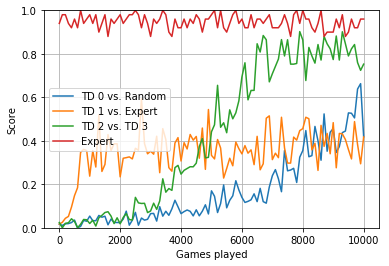

In [86]:
pd.DataFrame(scores, index=iterations).plot()
plt.xlabel("Games played")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid()
plt.savefig("learning_rates.pdf")

In [112]:
pd.DataFrame(scores, index=index).tail()

,TD 0 vs. Random,TD 1 vs. Expert,TD 2 vs. TD 3,Expert
9600,0.526848,0.3168,0.823200,0.96
9700,0.505344,0.4884,0.842800,0.92
9800,0.638176,0.3828,0.760000,0.92
9900,0.662888,0.2944,0.724224,0.96
10000,0.418880,0.4176,0.752640,0.96


In [87]:
[p.games_played for p in td_players]

[10000, 10000, 10000, 10000]

In [88]:
games_lost = td_players[1].games_lost
players = [td_players[1], ExpertPlayer("EXPERT")]
train_computer_players(players, iterations=1000, show=False)
games_lost = td_players[1].games_lost - games_lost
print("Games lost against expert:", games_lost)

Games lost against expert: 0


In [89]:
len(td_players[1].value_function)

915

In [90]:
combined_values = pd.concat(
    [pd.Series(td.value_function) for td in td_players], 
    axis=1, 
    sort=True
)
combined_values['Mean'] = combined_values.mean(axis=1)
combined_values = combined_values.sort_values(by='Mean', ascending=False)
combined_values.head(10)

,0,1,2,3,Mean
b'OSOSSOOSS',0.996242,NaN,0.933258,0.962458,0.963986
b'SSOSOOSOS',0.988121,NaN,0.933258,0.933258,0.951546
b'SOO--OSSS',0.949944,NaN,NaN,NaN,0.949944
b'SOSSOOSSO',0.978882,NaN,0.911011,0.933258,0.941050
b'SSOOSSOOS',0.991091,NaN,0.949944,0.881348,0.940794
b'OOSSSOSSO',0.999108,NaN,0.881348,0.933258,0.937905
b'OSOSSSSOO',0.997886,NaN,0.933258,0.881348,0.937497
b'SOOSSSOSO',0.996242,NaN,0.881348,0.933258,0.936949
b'OOSSOOSSS',0.988121,NaN,0.911011,0.911011,0.936714
b'OSOOSSSSO',0.993318,NaN,0.933258,0.881348,0.935975


In [91]:
combined_values.tail()

,0,1,2,3,Mean
b'-OSOOSSSO',0.158203,NaN,0.210938,0.281250,0.216797
b'S-OOOSSOS',0.158203,NaN,0.210938,0.281250,0.216797
b'SSOOOS-OS',0.158203,NaN,0.210938,0.281250,0.216797
b'SSOOO-SSO',0.210938,NaN,0.210938,0.210938,0.210938
b'SOSOOSS-O',0.210938,NaN,0.158203,0.210938,0.193359


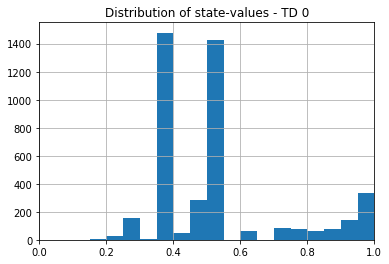

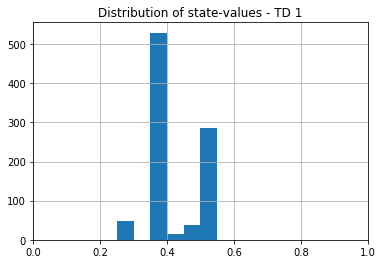

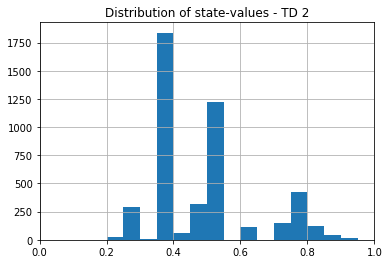

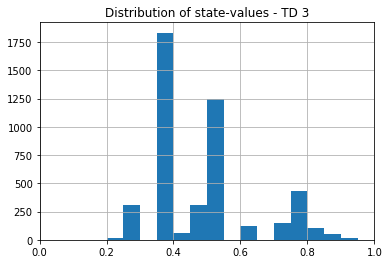

In [92]:
bins = np.linspace(0.0, 1.0, 21)
for td in td_players:
    h = pd.Series(td.value_function).hist(bins=bins)
    plt.xlim(0, 1.0)
    plt.title("Distribution of state-values - %s" % td.name)
    plt.show()

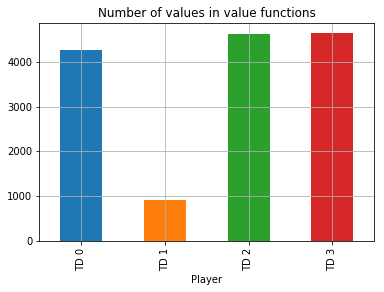

In [111]:
number_of_values = pd.Series(
    [len(td.value_function) for td in td_players],
    index=pd.Index([td.name for td in td_players], name='Player')
)

number_of_values.plot.bar()
plt.title("Number of values in value functions")
plt.grid()

In [94]:
v = td_players[0].value_function

# These should be high values
(v[b'SSS---OO-'], v[b'SSS----OO'], v[b'SSSOO----'], v[b'SSS-OO---'], 
 v[b'SSS---O-O'], v[b'SSSO-O---'], v[b'SSSO--O--'], v[b'SSS-O--O-'],
 v[b'SSS--O--O'], v[b'SSSO---O-'], v[b'SSSO----O'], v[b'SSS-O-O--'],
 v[b'SSS-O---O'])

(0.991091025993228,
 0.9999107089549151,
 0.9978858587073773,
 0.9881213679909706,
 0.88134765625,
 0.993318269494921,
 0.88134765625,
 0.996241526590893,
 0.9978858587073773,
 0.9978858587073773,
 0.9988107955228998,
 0.9110107421875,
 0.9991080966421748)

### Prepare some tests

In [95]:
from importlib import reload
import gamelearner
reload(gamelearner)
TDLearner = gamelearner.TDLearner
TicTacToeGame = gamelearner.TicTacToeGame
GameController = gamelearner.GameController
RandomPlayer = gamelearner.RandomPlayer

In [96]:
game = TicTacToeGame()
roles = game.roles

In [97]:
learning_rate=0.25
gamma=1.0
off_policy_rate=0.1
initial_value=0.5
use_afterstates=True

td = TDLearner(
    learning_rate=learning_rate, 
    gamma=gamma,
    off_policy_rate=off_policy_rate,
    initial_value=initial_value,
    use_afterstates=use_afterstates
)
assert len(td.value_function) == 0

In [98]:
# Simulate value_functions
value_functions = {
    1: {},
    2: {}
}

In [99]:
# First play a series of set-moves

planned_moves = [
    (1, (0, 0)),
    (2, (2, 2)),
    (1, (0, 1)),
    (2, (2, 1)),
    (1, (0, 2))
]
game_states = {
    1: [],
    2: []
}
afterstates = {
    1: [],
    2: []   
}

def get_value(role, state_key):
    
    value = value_functions[role].get(state_key, None)
    if value is None:
        value = initial_value
    
    return value

game = TicTacToeGame()
for move in planned_moves:
    role, position = move
    state_key = game.generate_state_key(game.state, role)
    game_states[role].append(state_key)
    for position in game.available_moves():
        possible_move = (role, position)
        next_state = game.next_state(possible_move)
        next_state_key = game.generate_state_key(next_state, role)
        #value_functions[role][next_state_key] = initial_value
        if possible_move == move:
            afterstates[role].append(next_state_key)
            value_functions[role][next_state_key] = \
                get_value(role, next_state_key)
            
    game.make_move(move)
    if game.game_over:
        opponent = [r for r in roles if r != role][0]
        if game.winner:
            if game.winner == role:
                rewards = {role: 1.0, opponent: 0.0}
            else:
                rewards = {role: 0.0, opponent: 1.0}
            for r in roles:
                state = afterstates[r][-1]
                value_functions[r][state] = \
                    value_functions[r][state] + \
                    learning_rate*(rewards[r] - \
                                   value_functions[r][state])
    if len(afterstates[role]) > 1:
        states = afterstates[role]
        # import pdb; pdb.set_trace()
        value_functions[role][states[-2]] = \
                value_functions[role][states[-2]] + \
                learning_rate*(0.0 + gamma*value_functions[role][states[-1]] -\
                               value_functions[role][states[-2]])

In [100]:
game_states

{1: [b'---------', b'S-------O', b'SS-----OO'],
 2: [b'O--------', b'OO------S']}

In [101]:
afterstates

{1: [b'S--------', b'SS------O', b'SSS----OO'],
 2: [b'O-------S', b'OO-----SS']}

In [102]:
value_functions

{1: {b'S--------': 0.5, b'SS------O': 0.53125, b'SSS----OO': 0.625},
 2: {b'O-------S': 0.5, b'OO-----SS': 0.375}}

In [103]:
game.game_over, game.winner

(True, 1)

In [104]:
correct_values = {
    1: {b'S--------': 0.5, b'SS------O': 0.53125, b'SSS----OO': 0.625},
    2: {b'O-------S': 0.5, b'OO-----SS': 0.375}
}
checks = []
for state_key, value in correct_values.items():
    checks.append(value_functions[state_key] == 
                  correct_values[state_key])
all(checks)

True